<a href="https://colab.research.google.com/github/OscarHdzHdz/Challenge-AluraStoreLatam/blob/main/TelecomX_Parte2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <h1><center>TELECOM X Parte 2</center></h1>



## Exploración y preparación de Datos

In [56]:
import pandas as pd
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.under_sampling import NearMiss

In [57]:
# importo el archivo con los datos normalizados
datos = pd.read_csv('/content/datos_normalizado.csv')
datos.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.80


In [58]:
# Eliminación de columnas irrelevantes
datos.drop(columns='customerID', inplace=True)
datos.head(2)

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0,Female,0,1,1,9,1,0,DSL,0,...,0,1,1,0,One year,1,Mailed check,65.6,593.3,2.19
1,0,Male,0,0,0,9,1,1,DSL,0,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.4,2.00


In [59]:
# revisión de metadata
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7032 non-null   int64  
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   int64  
 4   Dependents        7032 non-null   int64  
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   int64  
 7   MultipleLines     7032 non-null   int64  
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   int64  
 10  OnlineBackup      7032 non-null   int64  
 11  DeviceProtection  7032 non-null   int64  
 12  TechSupport       7032 non-null   int64  
 13  StreamingTV       7032 non-null   int64  
 14  StreamingMovies   7032 non-null   int64  
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   int64  


### Encoding

In [60]:
var_cat = datos.drop(columns='Churn')
var_res = datos['Churn']

In [61]:
columnas = var_cat.columns

In [62]:
one_hot = make_column_transformer((OneHotEncoder(drop='if_binary'),['gender','InternetService', 'Contract', 'PaymentMethod']),
                                  remainder='passthrough',
                                  sparse_threshold=0,
                                  force_int_remainder_cols=False)

In [63]:
var_cat = one_hot.fit_transform(var_cat)

In [64]:
one_hot.get_feature_names_out(columnas)

array(['onehotencoder__gender_Male', 'onehotencoder__InternetService_DSL',
       'onehotencoder__InternetService_Fiber optic',
       'onehotencoder__InternetService_No',
       'onehotencoder__Contract_Month-to-month',
       'onehotencoder__Contract_One year',
       'onehotencoder__Contract_Two year',
       'onehotencoder__PaymentMethod_Bank transfer (automatic)',
       'onehotencoder__PaymentMethod_Credit card (automatic)',
       'onehotencoder__PaymentMethod_Electronic check',
       'onehotencoder__PaymentMethod_Mailed check',
       'remainder__SeniorCitizen', 'remainder__Partner',
       'remainder__Dependents', 'remainder__tenure',
       'remainder__PhoneService', 'remainder__MultipleLines',
       'remainder__OnlineSecurity', 'remainder__OnlineBackup',
       'remainder__DeviceProtection', 'remainder__TechSupport',
       'remainder__StreamingTV', 'remainder__StreamingMovies',
       'remainder__PaperlessBilling', 'remainder__Charges.Monthly',
       'remainder__Charges.

In [65]:
pd.DataFrame(var_cat, columns=one_hot.get_feature_names_out(columnas))

,onehotencoder__gender_Male,onehotencoder__InternetService_DSL,onehotencoder__InternetService_Fiber optic,onehotencoder__InternetService_No,onehotencoder__Contract_Month-to-month,onehotencoder__Contract_One year,onehotencoder__Contract_Two year,onehotencoder__PaymentMethod_Bank transfer (automatic),onehotencoder__PaymentMethod_Credit card (automatic),onehotencoder__PaymentMethod_Electronic check,...,remainder__OnlineSecurity,remainder__OnlineBackup,remainder__DeviceProtection,remainder__TechSupport,remainder__StreamingTV,remainder__StreamingMovies,remainder__PaperlessBilling,remainder__Charges.Monthly,remainder__Charges.Total,remainder__Cuentas_Diarias
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,65.60,593.30,2.19
1,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,59.90,542.40,2.00
2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,73.90,280.85,2.46
3,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,98.00,1237.85,3.27
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,83.90,267.40,2.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,55.15,742.90,1.84
7028,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,85.10,1873.70,2.84
7029,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,50.30,92.75,1.68
7030,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,67.85,4627.65,2.26


### Verificación de la proporción de cancelaciones

In [66]:
# Verificación de la proporción de cancelaciónes
datos['Churn'].value_counts(normalize=True)

,proportion
Churn,
0,0.734215
1,0.265785


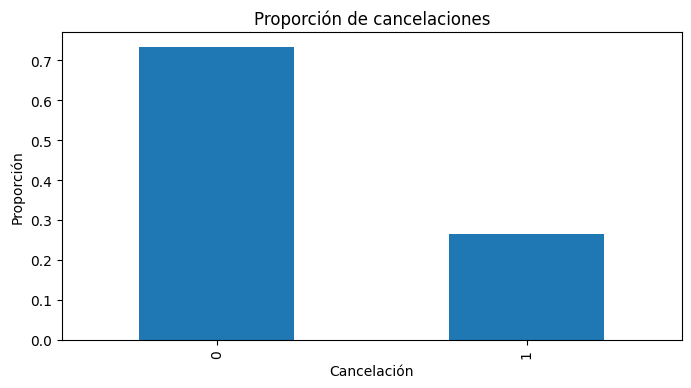

In [67]:
ax = datos['Churn'].value_counts(normalize=True).plot(kind='bar', figsize=(8,4))
plt.title('Proporción de cancelaciones')
plt.xlabel('Cancelación')
plt.ylabel('Proporción')
plt.show()

### Normalización de Datos

In [68]:
# Normalización de datos para modelo de Regresión logística
from sklearn.preprocessing import MinMaxScaler
normalizacion = MinMaxScaler()
var_cat_normalizado = normalizacion.fit_transform(var_cat)


In [69]:
var_cat_final = pd.DataFrame(var_cat_normalizado, columns=one_hot.get_feature_names_out(columnas))

In [70]:
df_final = pd.concat([var_res, var_cat_final], axis=1)
df_final.head(2)

,Churn,onehotencoder__gender_Male,onehotencoder__InternetService_DSL,onehotencoder__InternetService_Fiber optic,onehotencoder__InternetService_No,onehotencoder__Contract_Month-to-month,onehotencoder__Contract_One year,onehotencoder__Contract_Two year,onehotencoder__PaymentMethod_Bank transfer (automatic),onehotencoder__PaymentMethod_Credit card (automatic),...,remainder__OnlineSecurity,remainder__OnlineBackup,remainder__DeviceProtection,remainder__TechSupport,remainder__StreamingTV,remainder__StreamingMovies,remainder__PaperlessBilling,remainder__Charges.Monthly,remainder__Charges.Total,remainder__Cuentas_Diarias
0,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.471144,0.066294,0.471642
1,0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.414428,0.060420,0.414925


## Correlación y selección de variables

In [71]:
# correlación de columnas numéricas
col_num= df_final.select_dtypes(include=['int64', 'float64']).columns
col_num

Index(['Churn', 'onehotencoder__gender_Male',
       'onehotencoder__InternetService_DSL',
       'onehotencoder__InternetService_Fiber optic',
       'onehotencoder__InternetService_No',
       'onehotencoder__Contract_Month-to-month',
       'onehotencoder__Contract_One year', 'onehotencoder__Contract_Two year',
       'onehotencoder__PaymentMethod_Bank transfer (automatic)',
       'onehotencoder__PaymentMethod_Credit card (automatic)',
       'onehotencoder__PaymentMethod_Electronic check',
       'onehotencoder__PaymentMethod_Mailed check', 'remainder__SeniorCitizen',
       'remainder__Partner', 'remainder__Dependents', 'remainder__tenure',
       'remainder__PhoneService', 'remainder__MultipleLines',
       'remainder__OnlineSecurity', 'remainder__OnlineBackup',
       'remainder__DeviceProtection', 'remainder__TechSupport',
       'remainder__StreamingTV', 'remainder__StreamingMovies',
       'remainder__PaperlessBilling', 'remainder__Charges.Monthly',
       'remainder__Charge

In [72]:
matriz_correlacion = df_final[col_num].corr()
matriz_correlacion

,Churn,onehotencoder__gender_Male,onehotencoder__InternetService_DSL,onehotencoder__InternetService_Fiber optic,onehotencoder__InternetService_No,onehotencoder__Contract_Month-to-month,onehotencoder__Contract_One year,onehotencoder__Contract_Two year,onehotencoder__PaymentMethod_Bank transfer (automatic),onehotencoder__PaymentMethod_Credit card (automatic),...,remainder__OnlineSecurity,remainder__OnlineBackup,remainder__DeviceProtection,remainder__TechSupport,remainder__StreamingTV,remainder__StreamingMovies,remainder__PaperlessBilling,remainder__Charges.Monthly,remainder__Charges.Total,remainder__Cuentas_Diarias
Churn,1.000000,-0.008545,-0.124141,0.307463,-0.227578,0.404565,-0.178225,-0.301552,-0.118136,-0.134687,...,-0.171270,-0.082307,-0.066193,-0.164716,0.063254,0.060860,0.191454,0.192858,-0.199484,0.192861
onehotencoder__gender_Male,-0.008545,1.000000,0.007584,-0.011189,0.004745,-0.003251,0.007755,-0.003603,-0.015973,0.001632,...,-0.016328,-0.013093,-0.000807,-0.008507,-0.007124,-0.010105,-0.011902,-0.013779,0.000048,-0.013856
onehotencoder__InternetService_DSL,-0.124141,0.007584,1.000000,-0.641636,-0.379912,-0.065226,0.047300,0.030924,0.024760,0.051222,...,0.320343,0.156765,0.145150,0.312183,0.014973,0.025623,-0.063390,-0.161368,-0.052190,-0.161413
onehotencoder__InternetService_Fiber optic,0.307463,-0.011189,-0.641636,1.000000,-0.465736,0.243014,-0.076809,-0.209965,-0.022779,-0.050552,...,-0.030506,0.165940,0.176356,-0.020299,0.329744,0.322457,0.326470,0.787195,0.360769,0.787200
onehotencoder__InternetService_No,-0.227578,0.004745,-0.379912,-0.465736,1.000000,-0.217824,0.038061,0.217542,-0.001094,0.001870,...,-0.332799,-0.380990,-0.380151,-0.335695,-0.414951,-0.418450,-0.320592,-0.763191,-0.374878,-0.763146
onehotencoder__Contract_Month-to-month,0.404565,-0.003251,-0.065226,0.243014,-0.217824,1.000000,-0.570053,-0.621933,-0.180159,-0.204960,...,-0.246844,-0.164393,-0.225988,-0.285491,-0.112550,-0.117867,0.168296,0.058933,-0.446776,0.058949
onehotencoder__Contract_One year,-0.178225,0.007755,0.047300,-0.076809,0.038061,-0.570053,1.000000,-0.288843,0.057629,0.067590,...,0.100658,0.084113,0.102911,0.096258,0.061930,0.064780,-0.052278,0.004810,0.170569,0.004796
onehotencoder__Contract_Two year,-0.301552,-0.003603,0.030924,-0.209965,0.217542,-0.621933,-0.288843,1.000000,0.155004,0.174410,...,0.191698,0.111391,0.165248,0.240924,0.072124,0.075603,-0.146281,-0.073256,0.358036,-0.073261
onehotencoder__PaymentMethod_Bank transfer (automatic),-0.118136,-0.015973,0.024760,-0.022779,-0.001094,-0.180159,0.057629,0.155004,1.000000,-0.278423,...,0.094366,0.086942,0.083047,0.100472,0.046121,0.048755,-0.017469,0.042410,0.186119,0.042391
onehotencoder__PaymentMethod_Credit card (automatic),-0.134687,0.001632,0.051222,-0.050552,0.001870,-0.204960,0.067590,0.174410,-0.278423,1.000000,...,0.115473,0.090455,0.111252,0.117024,0.040010,0.048398,-0.013726,0.030055,0.182663,0.030070


In [73]:
# Correlación entre variables
df_final['Churn'].corr(df_final['remainder__Charges.Total'])

np.float64(-0.1994840835675641)

In [74]:
import plotly.express as px

In [75]:
px.box(df_final, x='remainder__Charges.Total', color='Churn')

In [76]:
df_final['Churn'].corr(df_final['remainder__tenure'])

np.float64(-0.3540493589532508)

In [77]:
px.box(df_final, x='remainder__tenure', color='Churn')

## Separación de datos

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
# hacemos la separación de los datos en datos de prueba y entrenamiento
X = df_final.drop(columns='Churn')
y = df_final['Churn']
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.3, stratify = y,random_state = 42)

## Creación de modelos

### 1. Random Forest

In [80]:
# creación y entrenamiento del modelo
from sklearn.ensemble import RandomForestClassifier
modelo_randomforest = RandomForestClassifier(max_depth = 10, n_estimators=100, random_state=42)
modelo_randomforest.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, random_state=42)

In [81]:
# hacemos la predicción usando el modelo
ypred_rf = modelo_randomforest.predict(X_test)

#### Evaluando el modelo Random Forest Classifier

In [82]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

El accuracy del modelo es 0.7962210483543275
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      3614
           1       0.66      0.48      0.56      1308

    accuracy                           0.80      4922
   macro avg       0.74      0.70      0.71      4922
weighted avg       0.78      0.80      0.79      4922

[[3285  329]
 [ 674  634]]


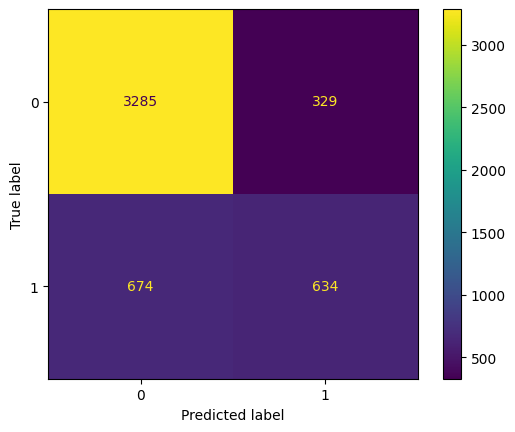

In [83]:
print(f'El accuracy del modelo es {accuracy_score(y_test, ypred_rf)}')
print(classification_report(y_test, ypred_rf))
print(confusion_matrix(y_test, ypred_rf))
ConfusionMatrixDisplay.from_predictions(y_test, ypred_rf);

### 2. Regresión Logística

In [84]:
# creamos el modelo, lo entrenamos y hacemos la predicción
from sklearn.linear_model import LogisticRegression
modelo_log_reg = LogisticRegression(penalty="l2", C=1.0, solver="lbfgs", max_iter=1000, random_state=42)
modelo_log_reg.fit(X_train, y_train)
y_pred_lr = modelo_log_reg.predict(X_test)

#### Evaluando el modelo de Regresión Logística

El accuracy del modelo es 0.8033319788703779
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      3614
           1       0.65      0.55      0.60      1308

    accuracy                           0.80      4922
   macro avg       0.75      0.72      0.73      4922
weighted avg       0.80      0.80      0.80      4922

[[3234  380]
 [ 588  720]]


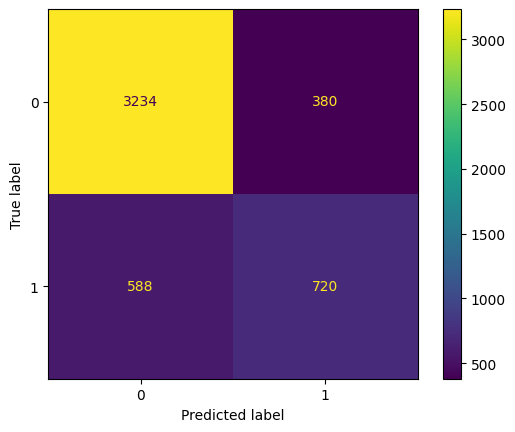

In [85]:
print(f'El accuracy del modelo es {accuracy_score(y_test, y_pred_lr)}')
print(classification_report(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lr);

### Balanceo de clases y uso de datos balanceados en los modelos

In [86]:
undersample = NearMiss(version=3)
X_balanceada, y_balanceada = undersample.fit_resample(X, y)

#### Para Random Forest

In [87]:
# entrenamos y predecimos con datos balanceados
modelo_randomforest = RandomForestClassifier(max_depth = 10, n_estimators=100, random_state=42)
modelo_randomforest.fit(X_balanceada, y_balanceada)
y_pred_bal_rf = modelo_randomforest.predict(X_test)

Accuracy: 0.885412433969931
[[3263  351]
 [ 213 1095]]
              precision    recall  f1-score   support

           0       0.94      0.90      0.92      3614
           1       0.76      0.84      0.80      1308

    accuracy                           0.89      4922
   macro avg       0.85      0.87      0.86      4922
weighted avg       0.89      0.89      0.89      4922



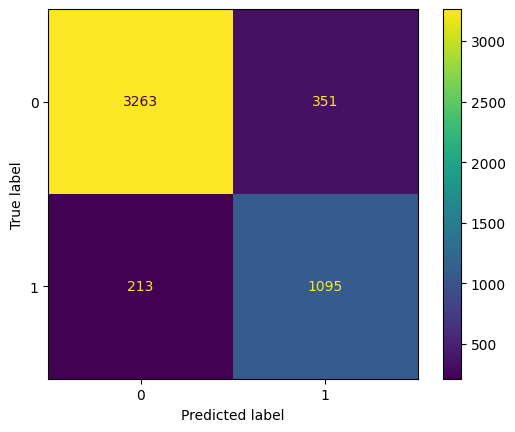

In [88]:
# evaluamos con los datos balanceados
print("Accuracy:", accuracy_score(y_test, y_pred_bal_rf))
print(confusion_matrix(y_test, y_pred_bal_rf))
print(classification_report(y_test, y_pred_bal_rf))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_bal_rf);

#### Para Regresión Logística

In [89]:
# entrenamos y predecimos con datos balanceados
modelo_log_reg = LogisticRegression(penalty="l2", C=1.0, solver="lbfgs", max_iter=1000, random_state=42)
modelo_log_reg.fit(X_balanceada, y_balanceada)
y_pred_bal_lr = modelo_log_reg.predict(X_test)

El accuracy del modelo es 0.7793579845591223
              precision    recall  f1-score   support

           0       0.87      0.82      0.85      3614
           1       0.57      0.66      0.62      1308

    accuracy                           0.78      4922
   macro avg       0.72      0.74      0.73      4922
weighted avg       0.79      0.78      0.78      4922

[[2967  647]
 [ 439  869]]


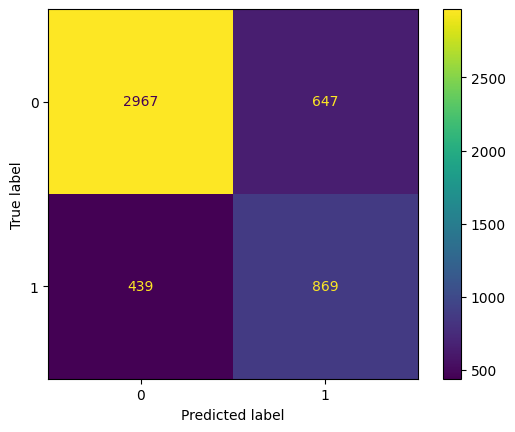

In [90]:
# Evaluamos con los datos balanceados
print(f'El accuracy del modelo es {accuracy_score(y_test, y_pred_bal_lr)}')
print(classification_report(y_test, y_pred_bal_lr))
print(confusion_matrix(y_test, y_pred_bal_lr))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_bal_lr);

## Análisis de la importancia de variables

In [91]:
# Para regresión logística
coef_df = pd.DataFrame({
    'Variable': X_balanceada.columns,
    'Coeficiente': modelo_log_reg.coef_[0]
}).sort_values(by="Coeficiente", ascending=False)
coef_df

,Variable,Coeficiente
2,onehotencoder__InternetService_Fiber optic,0.451801
11,remainder__SeniorCitizen,0.315799
6,onehotencoder__Contract_Two year,0.265050
16,remainder__MultipleLines,0.255155
9,onehotencoder__PaymentMethod_Electronic check,0.243799
23,remainder__PaperlessBilling,0.219371
21,remainder__StreamingTV,0.176432
22,remainder__StreamingMovies,0.124611
10,onehotencoder__PaymentMethod_Mailed check,0.061595
19,remainder__DeviceProtection,0.061351


In [92]:
# Para Random Forest
importancias = pd.DataFrame({
    "Variable": X_balanceada.columns,
    "Importancia": modelo_randomforest.feature_importances_
}).sort_values(by="Importancia", ascending=False)
importancias

,Variable,Importancia
25,remainder__Charges.Total,0.190887
14,remainder__tenure,0.175535
24,remainder__Charges.Monthly,0.130996
26,remainder__Cuentas_Diarias,0.120608
4,onehotencoder__Contract_Month-to-month,0.029245
9,onehotencoder__PaymentMethod_Electronic check,0.028059
23,remainder__PaperlessBilling,0.024450
17,remainder__OnlineSecurity,0.021261
11,remainder__SeniorCitizen,0.020504
12,remainder__Partner,0.020242


## **Conclusiones**

El objetivo del proyecto fue crear modelos de machine learning que puedan identificar eficientemente a clientes con mayor probabilidad de cancelar sus servicios con Telecom X.

Para esto se hizo una preparación de los datos (encoding y normalización), se crearon 2 modelos, uno de Regresión Logística y un Random Forest Classifier y se entrenaron y evaluaron los modelos sin y con balanceo de clases.

Ambos modelos tuvieron mejor desempeño con balanceo de clases y el modelo Random Forest tuvo un mejor desempeño que el de Regresión logística como se detalla a continuación:

🔹 Regresión Logística (Clase 1)

*   Precision: 0.57
*   Recall: 0.66
*   F1: 0.62
*   Accuracy: 0.78

🔹 Random Forest (Clase 1)

*   Precision: 0.76
*   Recall: 0.84
*   F1: 0.80
*   Accuracy: 0.89

Como podemos ver, Random Forest mejora:

 +18 puntos en recall (0.66 → 0.84)

 +19 puntos en F1

 +11 puntos en accuracy

 +19 puntos en precision

 Lo cuál indica una mejora estructural.

 Random Forest predice mejor la cancelación ya que esta está determinada por relaciones no lineales y porque existe una interacción entre variables

 Al analizar la importancia de las variables en ambos modelos podemos ver que:

  + Los clientes con menor antiguedad y con contratos mes a mes son los más propensos a cancelar, lo cuál es reforzado por la alta correlación entre estas dos variables y la correlación significativa entre cada una de ellas con el "Churn".
  
  + De igual forma vemos una importante influencia de la variable "Charges_Montly" (costo mensual) lo cuál indica que esta variable también influye en la decisión de cancelación de los clientes.

 La importancia de las variables arrojada por los modelos así como las correlaciones entre variables obtenidas son consistentes con el análisis de Datos y el informe realizado en la entrega previa (TelecomX_LATAM).


## Recomendaciones estratégicas

+ Migración a contratos de uno o 2 años: Ofrecer mayores beneficios para clientes que contraten los servicios por al menos un año y de igual forma ofrecer incentivos a aquellos clientes que cambien su contrato mensual a un contrato por uno o dos años. Estos beneficios pueden ser descuentos, precios preferenciales, mejoras en el tipo de servicio, etc.
+ Evaluación de clientes que cumplan con las características de poco tenure, contrato mes a mes, con costos mensuales elevados más las indicadas en el reporte TelecomX_Latam implementando el modelo Random Forest para predecir la cancelación, generando alertas y así dar prioridad a esos clientes en las campañas de retención/conslidación de la relación de negocios.

Al implementar estas recomendaciones junto con las propuestas en el informe TelecomX_LATAM, la empresa mejorará la consolidación de la relación de negocios con clientes actuales y nuevos clientes lo que llevará a reducir el número de cancelaciones existente y a la vez, servirá para incrementar la calidad de los serivicios y atención ofrecida por la compañía a sus clientes.